<a href="https://colab.research.google.com/github/ABHIRAM199/my_practice/blob/main/Word_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [ ]:
file = open('Royal_data.txt','r')
royal_data = file.readlines()
file.close()
print(royal_data)

['The future king is the prince\n', 'Daughter is the princess\n', 'Son is the prince\n', 'Only a man can be a king\n', 'Only a woman can be a queen\n', 'The princess will be a queen\n', 'The prince is a strong man\n', 'The princess is a beautiful woman\n', 'Prince is only a boy now\n', 'Prince will be king\n', 'A boy will be a man']


In [ ]:
for i in range(len(royal_data)):
    royal_data[i] = royal_data[i].lower().replace('\n','')
print(royal_data)

['the future king is the prince', 'daughter is the princess', 'son is the prince', 'only a man can be a king', 'only a woman can be a queen', 'the princess will be a queen', 'the prince is a strong man', 'the princess is a beautiful woman', 'prince is only a boy now', 'prince will be king', 'a boy will be a man']


# Remove stop words and tokenize

In [ ]:
stop_words = ['the','is','are','can','will','be','a','only','their','now','and','at','it']

filter_data = []

for sent in royal_data:
  temp = []
  for word in sent.split():
    if word not in stop_words:
      temp.append(word)
  filter_data.append(temp)
print(filter_data)



[['future', 'king', 'prince'], ['daughter', 'princess'], ['son', 'prince'], ['man', 'king'], ['woman', 'queen'], ['princess', 'queen'], ['prince', 'strong', 'man'], ['princess', 'beautiful', 'woman'], ['prince', 'boy'], ['prince', 'king'], ['boy', 'man']]


# Creating Bigrams

In [ ]:
bigrams = []
for word_list in filter_data:
  for i in range(len(word_list)-1):
    for j in range(i+1, len(word_list)):
       bigrams.append([word_list[i],word_list[j]])
       bigrams.append([word_list[j],word_list[i]])


print(bigrams)



[['future', 'king'], ['king', 'future'], ['future', 'prince'], ['prince', 'future'], ['king', 'prince'], ['prince', 'king'], ['daughter', 'princess'], ['princess', 'daughter'], ['son', 'prince'], ['prince', 'son'], ['man', 'king'], ['king', 'man'], ['woman', 'queen'], ['queen', 'woman'], ['princess', 'queen'], ['queen', 'princess'], ['prince', 'strong'], ['strong', 'prince'], ['prince', 'man'], ['man', 'prince'], ['strong', 'man'], ['man', 'strong'], ['princess', 'beautiful'], ['beautiful', 'princess'], ['princess', 'woman'], ['woman', 'princess'], ['beautiful', 'woman'], ['woman', 'beautiful'], ['prince', 'boy'], ['boy', 'prince'], ['prince', 'king'], ['king', 'prince'], ['boy', 'man'], ['man', 'boy']]


# Vocabulary

In [ ]:
all_words = []

for sent in filter_data:
  all_words.extend(sent)

all_words = list(set(all_words))
all_words.sort()
print(all_words)
print(len(all_words))

['beautiful', 'boy', 'daughter', 'future', 'king', 'man', 'prince', 'princess', 'queen', 'son', 'strong', 'woman']
12


# One Hot Encoding

In [ ]:
words_dict = {}
counter = 0
for word in all_words:
  words_dict[word] = counter
  counter += 1

print(words_dict)

{'beautiful': 0, 'boy': 1, 'daughter': 2, 'future': 3, 'king': 4, 'man': 5, 'prince': 6, 'princess': 7, 'queen': 8, 'son': 9, 'strong': 10, 'woman': 11}


In [ ]:
import numpy as np

one_hot = np.zeros((len(all_words),len(all_words)))

for i in range(len(all_words)):
  one_hot[i][i] = 1


print(one_hot)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
onehot_dict = {}
for i in range(len(all_words)):
  onehot_dict[all_words[i]] = one_hot[i]

print(onehot_dict)

{'beautiful': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'boy': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'daughter': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'future': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]), 'king': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]), 'man': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]), 'prince': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]), 'princess': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), 'queen': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]), 'son': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]), 'strong': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]), 'woman': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}


In [ ]:
X = []
Y = []

for bi in bigrams:
  X.append(onehot_dict[bi[0]])
  Y.append(onehot_dict[bi[1]])

X = np.array(X)
Y = np.array(Y)

# Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Input

vocab_size =len(one_hot[0])
embed_size = 2
model = Sequential()
model.add(Input(shape= (vocab_size,)))
model.add(Dense(embed_size, activation= 'linear'))
model.add(Dense(vocab_size, activation='softmax'))


In [ ]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam')

In [ ]:
model.fit(X,Y, epochs = 1000)

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7349 
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7403 
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7223 
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7389 
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7315 
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7173 
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7472 
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7207 
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7401 
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7452 
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7297 
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7180 
Epoch 13/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7235 
Epoch 14/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7257 
Epoch 15/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7422 
Epoc

In [26]:
weights = model.get_weights()[0]

word_embedding = {}

for word in all_words:
  word_embedding[word] = weights[words_dict[word]]


print(word_embedding)

{'beautiful': array([ 1.0221791, -1.8068373], dtype=float32), 'boy': array([1.3954767 , 0.53080565], dtype=float32), 'daughter': array([ 1.6930332, -1.3403169], dtype=float32), 'future': array([0.5345706, 1.6961919], dtype=float32), 'king': array([1.1981398, 0.3574925], dtype=float32), 'man': array([-0.6235818,  1.2409828], dtype=float32), 'prince': array([-0.8329827,  0.7207141], dtype=float32), 'princess': array([-0.84550893, -1.6926806 ], dtype=float32), 'queen': array([ 1.3240043, -1.9462761], dtype=float32), 'son': array([1.5666748, 1.1807239], dtype=float32), 'strong': array([1.4247203, 0.4179069], dtype=float32), 'woman': array([-0.5328956, -1.6142728], dtype=float32)}


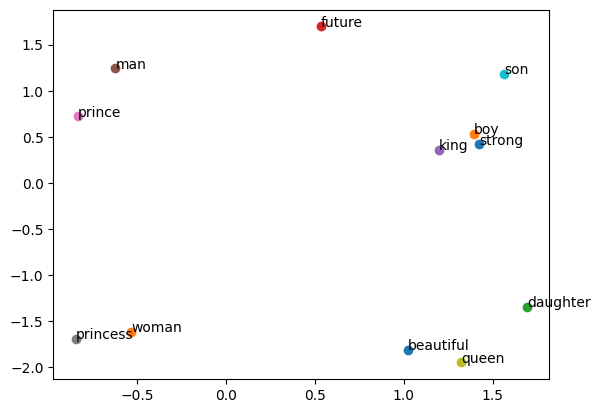

In [28]:
import matplotlib.pyplot as plt

for word in all_words:
  coordinates = word_embedding[word]
  plt.scatter(coordinates[0],coordinates[1])
  plt.annotate(word, (coordinates[0],coordinates[1]))